<a href="https://colab.research.google.com/github/sooieese00/environment-trends-Korea/blob/main/wordnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#실행
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#실행
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import glob
import os

In [ ]:
# 연관성 분석을 수행하는 함수 정의
def perform_correlation_analysis(df, output_dir):
    words_joined = df['preprocessed_Transcript'].tolist()
    countVectorizer = CountVectorizer(max_features=50)
    dtm = countVectorizer.fit_transform(words_joined)
    dtm_dense = dtm.todense()
    dtm_name = countVectorizer.get_feature_names_out()

    word_corr = np.corrcoef(dtm_dense, rowvar=False)
    D = pd.DataFrame(word_corr, index=dtm_name, columns=dtm_name)

    # 저장된 데이터프레임 확인
    D.to_csv(os.path.join(output_dir, 'word_correlation.csv'))

    word_edges = []
    for i in range(dtm_dense.shape[1]):
        for j in range(dtm_dense.shape[1]):
            if i != j:
                word_edges.append((dtm_name[i], dtm_name[j], word_corr[i, j]))
    word_edges_sorted = sorted(word_edges, key=lambda x: x[2], reverse=True)

    # 상위 10개의 단어쌍과 상관계수 출력
    print(word_edges_sorted[:10])

In [ ]:
# 메인 함수 정의
def main(input_directory):

     # 전처리된 각 파일에 대해 연관성 분석 수행
    for filepath in glob.glob(os.path.join(input_directory, "okt2_20*.csv")):
        df = pd.read_csv(filepath, encoding='utf-8')
        filename = os.path.basename(filepath)
        year = filename[5:-4]
        output_dir = os.path.join(input_directory, 'correlation_results', os.path.basename(filepath)[:-4])
        os.makedirs(output_dir, exist_ok=True)
        perform_correlation_analysis(df, output_dir)


In [ ]:
input_directory = '/content/drive/MyDrive/env_capstone/year'

# 실행
main(input_directory)

In [ ]:
#......................여기부터 연습..............#

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/env_capstone/year/okt2_2024.csv", encoding='utf-8')

In [ ]:
df.head()

,Published At,Year,Transcript,preprocessed_Transcript
0,2024-01-01,2024,2024년부터 식품에서 사라지는 이것\n올해부터 식품 표기에서 유통기한이\n사라집니...,식품 식품 표기 유통 기한 유통 기한 소비 기한 확인 유통 기한 판매 수 마지막 날...
1,2024-01-01,2024,저 김돌 씨 어 예 여기서 이성적으로\n파밍할 수 있는게 김돌 씨밖에 없어요\n제 ...,김돌 씨 성적 파밍 수 김돌 씨 새끼 고장 템템 일로 거 레버 김복 결단 개빠 김똘...
2,2024-01-01,2024,아보카도는 영양만점 식재료로 점점\n찾는 사람들이 많아지고 있습니다\n하지만 사실 ...,아보카도 영양 만점 식 재료 점점 아보카도 재배 부담 아보카도 추가 재배 위 숲 개...
3,2024-01-02,2024,도서관 가는 길에 버려져 있는\n쓰레기들을 주어\n[음악]\n버렸습니다,도서관 길 쓰레기 주어
4,2024-01-02,2024,[음악]\nh\n[음악]\n[박수]\n[음악]\n[음악]\nh\n[음악]\n자 새 ...,새 복 사랑 회 차 방송 친 새 복 미리 오신 인사 힐링 가든 맘 가막 섬 영준 홍...


In [ ]:
stopwords_2024 = ['거지', '계산', '남자', '노래', '누가', '누나', '마음', '민정', '방송',
                  '아버지', '어서', '엄마', '왜냐면', '인사', '새끼', '친구', '인생',
                  '확인', '주시', '사랑', '감사', '정신', '마지막']
def remove_stopwords(text):

    # 단어 리스트로 분할
    words = text.split()
    # 불용어 제거
    words = [word for word in words if word not in stopwords_2024]
    # 다시 문자열로 합침
    return ' '.join(words)


In [ ]:
df.dropna(subset=['preprocessed_Transcript'], inplace=True)
# 불용어 제거 적용
df['preprocessed_Transcript'] = df['preprocessed_Transcript'].apply(remove_stopwords)
df.to_csv("/content/drive/MyDrive/env_capstone/year/processed_okt2_2024.csv", index=False, encoding='utf-8')

In [ ]:
words_joined = df['preprocessed_Transcript'].tolist()
countVectorizer = CountVectorizer(max_features=50)
dtm = countVectorizer.fit_transform(words_joined)
dtm_dense = dtm.todense()
print(dtm_dense)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 2 0 ... 0 2 0]]


In [ ]:
dtm_name = countVectorizer.get_feature_names_out()
dtm_name

#상관계수(-1에서 1 사이값)
word_corr = np.corrcoef(dtm_dense, rowvar=False)
#데이터프레임 형태로 바꿈
D = pd.DataFrame(word_corr, index=dtm_name, columns=dtm_name)
D

,감사,개발,공부,관리,기술,기업,나무,노력,도시,마지막,...,준비,지구,지역,지원,진행,처리,친구,탄소,한국,확인
감사,1.000000,0.038209,0.223092,0.105541,-0.000359,0.066269,0.071272,0.327887,0.030864,0.595248,...,0.352686,0.007560,0.194511,0.141262,0.338602,0.177017,0.392917,0.010394,0.330956,0.014875
개발,0.038209,1.000000,0.003678,0.126124,0.186927,0.089399,0.066423,0.131445,0.141755,0.101719,...,0.014376,0.242806,0.219881,0.083571,0.094919,0.016172,-0.014759,0.062345,0.107447,0.042394
공부,0.223092,0.003678,1.000000,0.069837,0.045284,0.017837,0.026011,0.158598,0.049750,0.155136,...,0.199900,0.026142,0.100498,0.040877,0.047184,0.130078,0.235194,0.031407,0.135228,0.023768
관리,0.105541,0.126124,0.069837,1.000000,0.163460,0.151988,0.041463,0.229307,0.196598,0.071168,...,0.101317,0.102758,0.415538,0.493989,0.649408,0.355649,0.014640,0.116340,0.129424,0.389217
기술,-0.000359,0.186927,0.045284,0.163460,1.000000,0.316639,0.055138,0.161974,0.194298,0.076387,...,0.046907,0.123984,0.213730,0.227113,0.134998,0.030150,-0.004070,0.135630,0.343707,0.053950
기업,0.066269,0.089399,0.017837,0.151988,0.316639,1.000000,0.021058,0.423978,0.134799,0.064274,...,0.100803,0.155126,0.260500,0.656947,0.206561,0.028662,0.011197,0.268793,0.425102,0.033898
나무,0.071272,0.066423,0.026011,0.041463,0.055138,0.021058,1.000000,0.099757,0.106147,0.097904,...,0.117340,0.359476,0.077057,-0.009245,0.018378,0.005085,0.436688,0.122644,0.069032,0.023510
노력,0.327887,0.131445,0.158598,0.229307,0.161974,0.423978,0.099757,1.000000,0.120718,0.421975,...,0.213570,0.282915,0.341547,0.367850,0.496861,0.283856,0.086880,0.374392,0.412195,0.028205
도시,0.030864,0.141755,0.049750,0.196598,0.194298,0.134799,0.106147,0.120718,1.000000,0.056323,...,0.059120,0.142631,0.302350,0.141313,0.103999,0.100379,0.002793,0.136880,0.063496,-0.017804
마지막,0.595248,0.101719,0.155136,0.071168,0.076387,0.064274,0.097904,0.421975,0.056323,1.000000,...,0.272759,0.066179,0.111046,0.039382,0.420978,0.342398,0.280112,0.022565,0.236723,0.023975


In [ ]:
# 데이터프레임 저장
input_directory = '/content/drive/MyDrive/env_capstone/year'
D.to_csv(os.path.join(input_directory, 'word_correlation_2024.csv'))

In [ ]:

word_edges = []
for i in range(dtm_dense.shape[1]):
    for j in range(dtm_dense.shape[1]):
        if i != j:
            word_edges.append((dtm_name[i], dtm_name[j], word_corr[i, j]))
word_edges_sorted = sorted(word_edges, key=lambda x: x[2], reverse=True)

# 상위 10개의 단어쌍과 상관계수 출력
print(word_edges_sorted[:10])

[('기업', '산업', 0.8906536290096437), ('산업', '기업', 0.8906536290096437), ('사업', '지원', 0.8321412479473752), ('지원', '사업', 0.8321412479473752), ('사랑', '인생', 0.777947582871603), ('인생', '사랑', 0.777947582871603), ('설명', '진행', 0.766628734523746), ('진행', '설명', 0.766628734523746), ('사랑', '세상', 0.7586689692354542), ('세상', '사랑', 0.7586689692354542)]


In [ ]:
import networkx as nx
# 두 단어 간의 공출현(co-occurrence) 빈도: 두 단어가 함께 등장한 횟수를 나타내는 정수 값
edgelist = np.dot(dtm_dense.T, dtm_dense)

edgelist

matrix([[3112,  283,  791, ...,  214, 1411,  151],
        [ 283, 5767,  137, ...,  601,  724,  244],
        [ 791,  137, 3139, ...,  317,  673,  166],
        ...,
        [ 214,  601,  317, ..., 8987, 1603,  212],
        [1411,  724,  673, ..., 1603, 4949,  179],
        [ 151,  244,  166, ...,  212,  179, 1616]])

In [ ]:
ngraph = nx.Graph(edgelist[:, :])
ngraph_map = dict(zip(ngraph.nodes(), dtm_name))

ngraph_map

{0: '감사',
 1: '개발',
 2: '공부',
 3: '관리',
 4: '기술',
 5: '기업',
 6: '나무',
 7: '노력',
 8: '도시',
 9: '마지막',
 10: '모습',
 11: '바람',
 12: '발생',
 13: '방법',
 14: '배출',
 15: '변화',
 16: '보고',
 17: '사랑',
 18: '사업',
 19: '사회',
 20: '산업',
 21: '새끼',
 22: '설명',
 23: '세계',
 24: '세상',
 25: '소리',
 26: '수도',
 27: '시기',
 28: '쓰레기',
 29: '에너지',
 30: '영향',
 31: '오염',
 32: '우리나라',
 33: '인간',
 34: '인생',
 35: '자리',
 36: '자연',
 37: '정부',
 38: '정신',
 39: '주시',
 40: '준비',
 41: '지구',
 42: '지역',
 43: '지원',
 44: '진행',
 45: '처리',
 46: '친구',
 47: '탄소',
 48: '한국',
 49: '확인'}

In [ ]:
from matplotlib import font_manager, rc
font_path = '/content/drive/MyDrive/HANCOM GOTHIC REGULAR.TTF'
fontprop = font_manager.FontProperties(fname=font_path)
font_name = fontprop.get_name()

# matplotlib의 rcParams에 폰트를 등록
font_manager.fontManager.addfont(font_path)
rc('font', family=font_name)

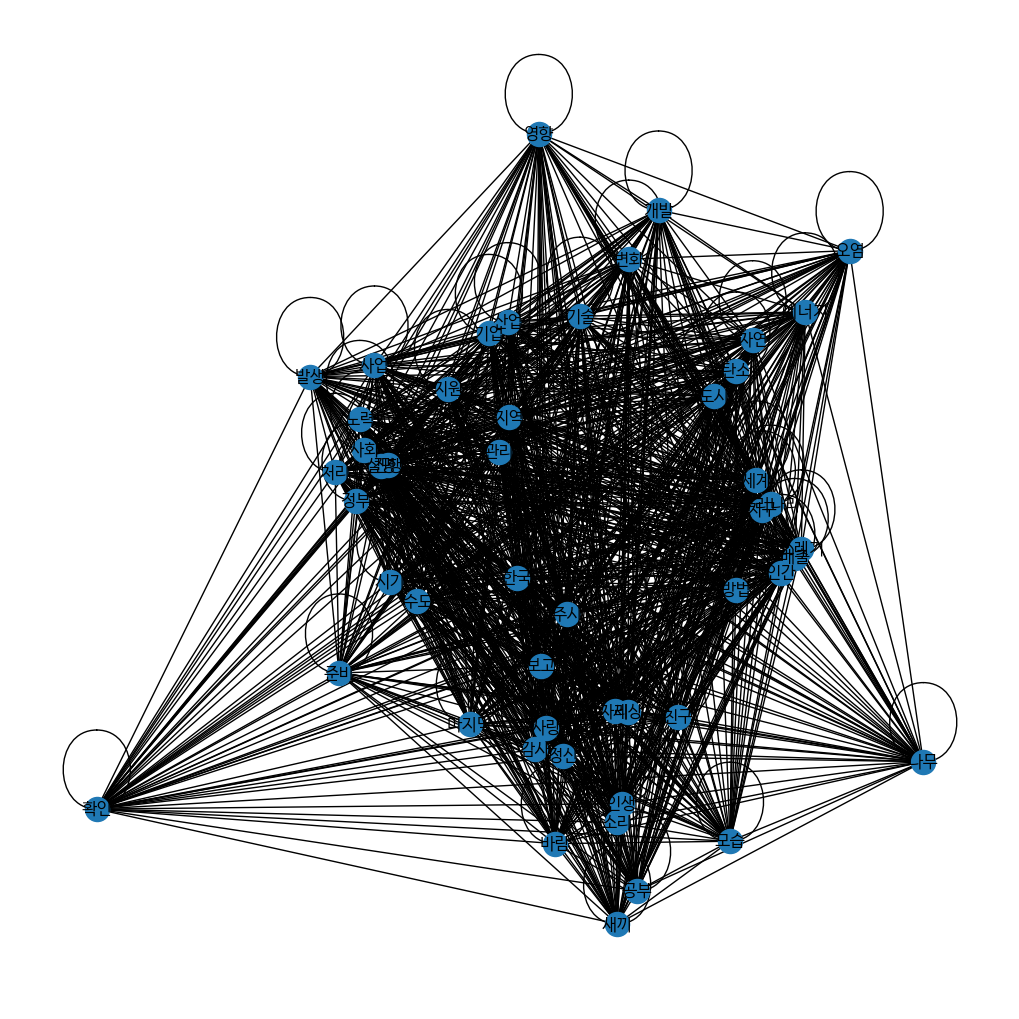

In [ ]:
plt.figure(figsize=(10, 10))
nx.draw(ngraph, labels=ngraph_map, with_labels=True, font_family=font_name)
plt.show()

In [ ]:
def create_network_graph(dtm_dense, dtm_name, font_path, output_directory, output_filename):
    # 엣지리스트 생성
    edgelist = np.dot(dtm_dense.T, dtm_dense)

    # 네트워크 그래프 생성
    ngraph = nx.Graph(edgelist[:, :])
    ngraph_map = dict(zip(ngraph.nodes(), dtm_name))

    # 폰트 설정
    fontprop = font_manager.FontProperties(fname=font_path)
    font_name = fontprop.get_name()

    # matplotlib의 rcParams에 폰트를 등록
    font_manager.fontManager.addfont(font_path)
    rc('font', family=font_name)

    # 엣지의 가중치 설정
    edges, weights = zip(*nx.get_edge_attributes(ngraph, 'weight').items())

    # 엣지의 가중치에 따라 색상 및 두께 설정
    weights = np.array(weights)
    norm_weights = (weights - weights.min()) / (weights.max() - weights.min())

    # 중심성 측정
    centrality = nx.degree_centrality(ngraph)
    node_size = [v * 10000 for v in centrality.values()]  # 중심성에 따라 노드 크기 조정

    # 군집 분석
    communities = nx.community.greedy_modularity_communities(ngraph)
    community_map = {}
    for i, community in enumerate(communities):
        for node in community:
            community_map[node] = i

    # 네트워크 그래프 그리기
    pos = nx.spring_layout(ngraph)  # 레이아웃 설정
    plt.figure(figsize=(15, 15))

    # 노드 그리기
    nx.draw_networkx_nodes(ngraph, pos, node_size=node_size, cmap=plt.cm.rainbow,
                           node_color=[community_map[node] for node in ngraph.nodes()], alpha=0.8)

    # 엣지 그리기
    nx.draw_networkx_edges(ngraph, pos, edgelist=edges, edge_color=norm_weights, edge_cmap=plt.cm.Blues, width=2.0)

    # 레이블 그리기
    nx.draw_networkx_labels(ngraph, pos, labels=ngraph_map, font_family=font_name, font_size=12)

    plt.title('Word Correlation Network', fontsize=20, fontproperties=fontprop)
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label='Edge Weight')
    plt.axis('off')

    # 그래프 저장
    output_path = os.path.join(output_directory, output_filename)
    plt.savefig(output_path)
    plt.show()

In [ ]:
output_directory = input_directory  # 필요에 따라 수정
output_filename = 'network_graph_2024.png'

<ipython-input-93-7f71b9ee95e5>:50: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label='Edge Weight')


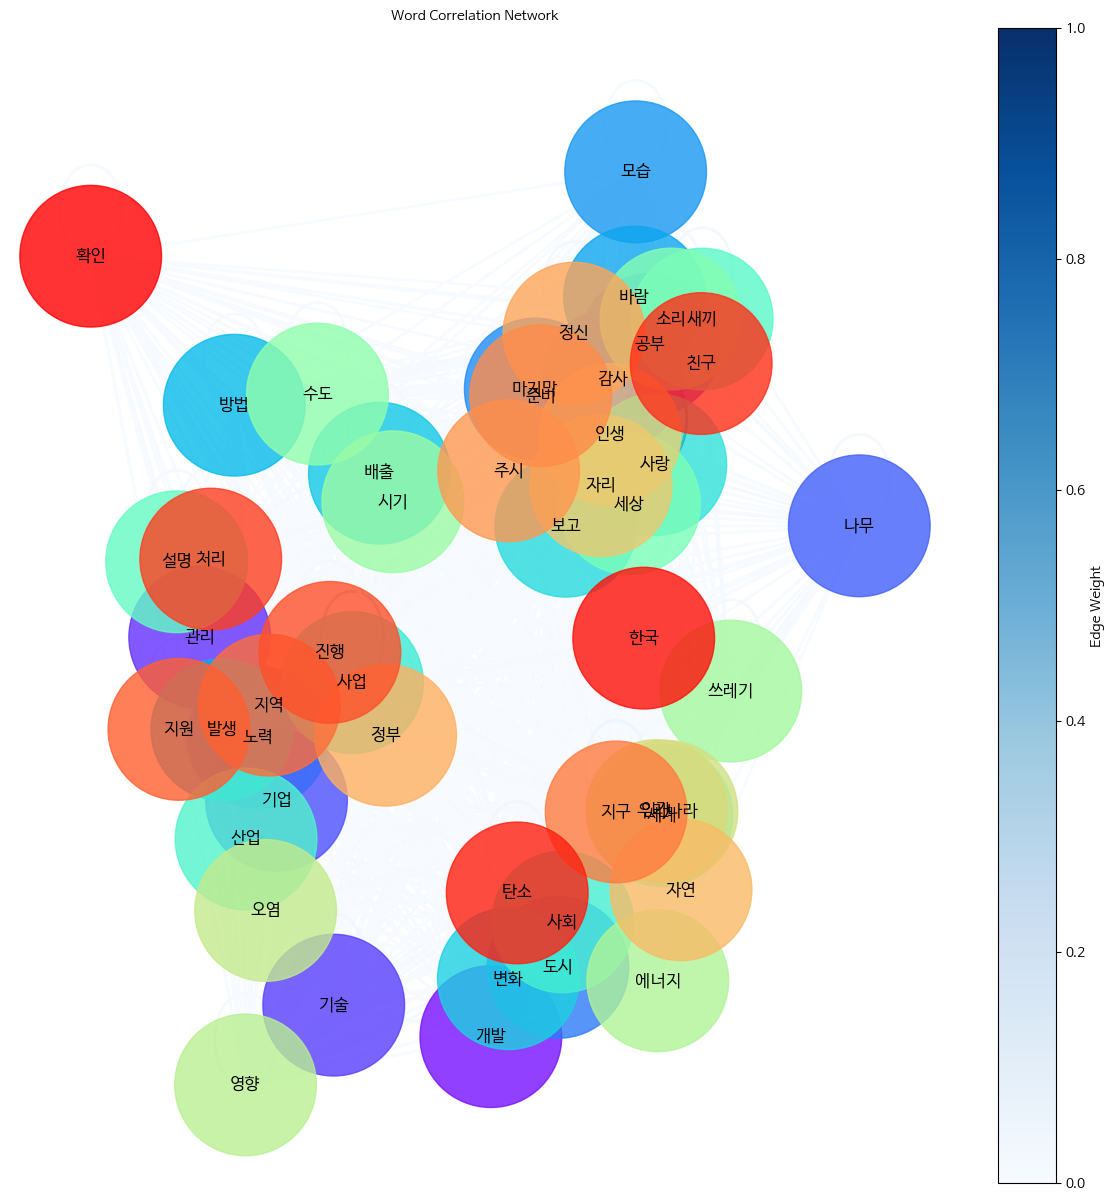

In [ ]:
create_network_graph(dtm_dense, dtm_name, font_path, output_directory, output_filename)

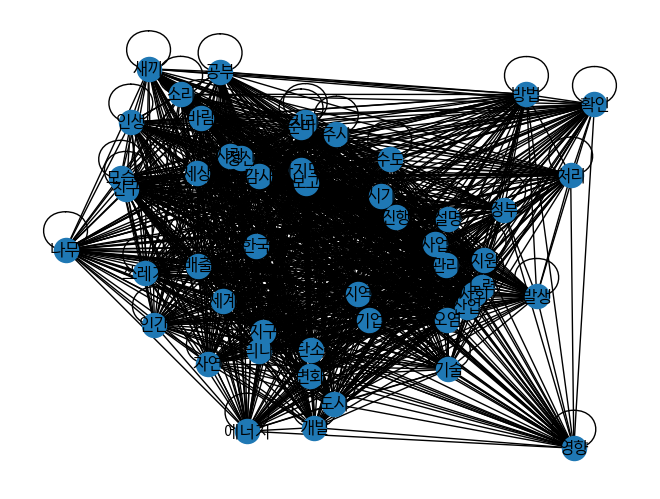

In [ ]:

nx.draw(ngraph, labels = ngraph_map, with_labels=True, font_family = font_name)
plt.show()